In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\srija\OneDrive\Desktop\Projects\INTERNSHIP PROJECTS\Cognifyz Technologies\Dataset .csv")

# TASK1: TOP CUISINES


In [5]:
# Determine the top three most common cuisines in the data set

In [6]:
print(df.shape)
print(df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [7]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [8]:
Cuisines_Count = df['Cuisines'].str.split('. ').explode('Cuisines').value_counts()
print(Cuisines_Count)
top_cuisines = Cuisines_Count.head(3)
print("The Top 3 Cuisines  are :",top_cuisines)

Cuisines
Indian       4682
Nort         3969
Food         2855
Chinese      2735
Fas          1987
             ... 
Cuisin          1
Irish           1
Varies          1
Peranakan       1
B�_rek          1
Name: count, Length: 152, dtype: int64
The Top 3 Cuisines  are : Cuisines
Indian    4682
Nort      3969
Food      2855
Name: count, dtype: int64


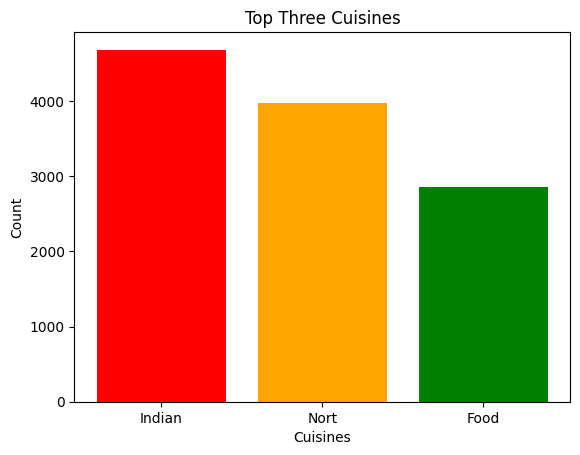

In [9]:
colours = {'green', 'orange','red'}
plt.bar(top_cuisines.index, top_cuisines.values, color=colours)
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Top Three Cuisines')
plt.show()

In [10]:
# Calculate the percentage of restaurants thta serve each of the top cuisines.

In [11]:
total_restaurant = len(df)

print(total_restaurant)
top_cuisine10 = Cuisines_Count.head()
percentage = (top_cuisine10/total_restaurant) * 100
print("The Market Share of Top 5 cuisines are : ",percentage)

9551
The Market Share of Top 5 cuisines are :  Cuisines
Indian     49.021045
Nort       41.555858
Food       29.892158
Chinese    28.635745
Fas        20.804104
Name: count, dtype: float64


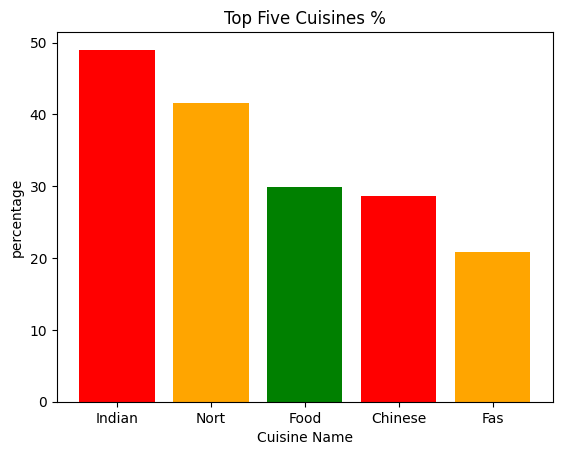

<Figure size 1200x600 with 0 Axes>

In [12]:
plt.bar(top_cuisine10.index, percentage.values, color= colours)
plt.xlabel('Cuisine Name')
plt.ylabel('percentage')
plt.title('Top Five Cuisines %')
plt.figure(figsize=(12,6))
plt.show()

# TASK2: CITY ANALYSIS

In [13]:
# Identify the city with the highest number of restaurants in the dataset

In [14]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [19]:
City_count = df['City'].value_counts()
restaurants_no = City_count.head(1)
print('City with highest no. of restaurants : ', City_count.idxmax())
print(restaurants_no)

City with highest no. of restaurants :  New Delhi
City
New Delhi    5473
Name: count, dtype: int64


In [20]:
# Calculate the Average rating for restaurants in each city

In [22]:
rating_by_each_city = df.groupby('City')['Aggregate rating'].mean()
print('The average rating of each city : ',rating_by_each_city)

The average rating of each city :  City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [23]:
# Determine the city with the highest Average rating

In [24]:
top_rated_city = rating_by_each_city.idxmax()
value = rating_by_each_city.max()
print('The city with highest Avg rating is : ',top_rated_city,",","Rating =",value)

The city with highest Avg rating is :  Inner City , Rating = 4.9


#  TASK3: Price Range Distribution

In [25]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [26]:
# Create a histogram or bar chart to visualize the distribution of price ranges on the restaurants

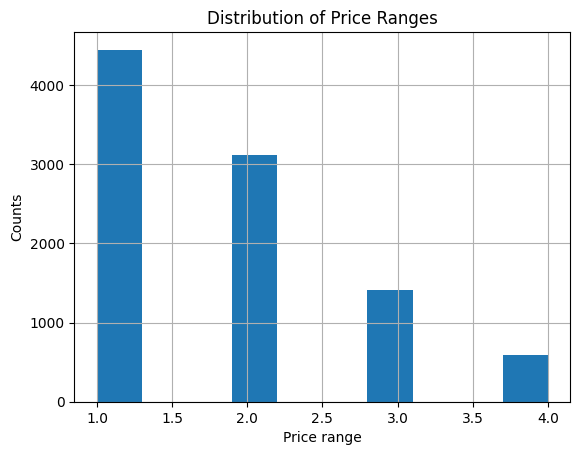

In [27]:
df.hist(column = 'Price range')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price range')
plt.ylabel('Counts')
plt.show()

In [28]:
# Calculate the percentage of restaurants each price range category

In [29]:
price_range_count= df['Price range'].value_counts()
total_restaurants = len(df)
percentage = round((price_range_count/total_restaurant)*100,2)
percentage_n= pd.merge(price_range_count, percentage,on = 'Price range')
print('the % of restaurant in each price range category are : ',percentage_n)

the % of restaurant in each price range category are :               count_x  count_y
Price range                  
1               4444    46.53
2               3113    32.59
3               1408    14.74
4                586     6.14


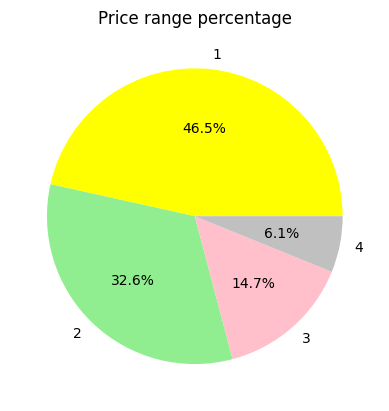

In [30]:
plt.pie(percentage,labels =percentage.index,autopct='%1.1f%%',colors = ['yellow','lightgreen','pink','silver'])
plt.title ('Price range percentage')
plt.show()

# TASK4: Online Delivery

In [31]:
# Determine the percentage of restaurants that offer online delivery

In [32]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [37]:
online_delivery = df['Has Online delivery'].value_counts().get('yes', 0)
print("Total restaurants with online delivery : ",online_delivery)

Total restaurants with online delivery :  0


In [38]:
no = df['Has Online delivery'].value_counts().get('No', 0)
print("restaurants with no online delivery : ",no)

restaurants with no online delivery :  7100


In [39]:
Row_count= len(df)
percentage_of_online_delivery = round((online_delivery/Row_count)*100,2)
print('Total % of online Delivery :',percentage_of_online_delivery)

Total % of online Delivery : 0.0


In [40]:
percentage_of_no_online_delivery = round((no/Row_count)*100,2)
print('Total % where online Delivery is not present :',percentage_of_no_online_delivery)

Total % where online Delivery is not present : 74.34


In [41]:
# Compare the average ratings of restaurants and without online delivery

In [46]:
Avg_rating_yes = round(df[df['Has Online delivery'] == 'yes']['Aggregate rating'].mean(),2)
print("Average rating with online delivery:", Avg_rating_yes)


Average rating with online delivery: nan


In [47]:
Avg_rating_No = round(df[df['Has Online delivery'] == 'no']['Aggregate rating'].mean(),2)
print("Average rating without online delivery:", Avg_rating_No)


Average rating without online delivery: nan


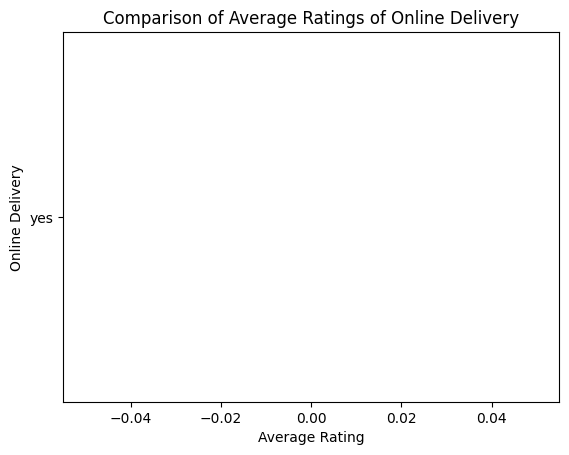

In [50]:
labels = ['yes', 'No']
average_rating = [Avg_rating_yes, Avg_rating_No]
colors= 'green' , 'yellow'
plt.barh(labels,average_rating, color=colours)
plt.xlabel('Average Rating')
plt.ylabel('Online Delivery')
plt.title('Comparison of Average Ratings of Online Delivery')
plt.show()